In [1]:
%pylab inline
pylab.rcParams["figure.figsize"] = (15,5)

Populating the interactive namespace from numpy and matplotlib


In [6]:
Fs = 1e6

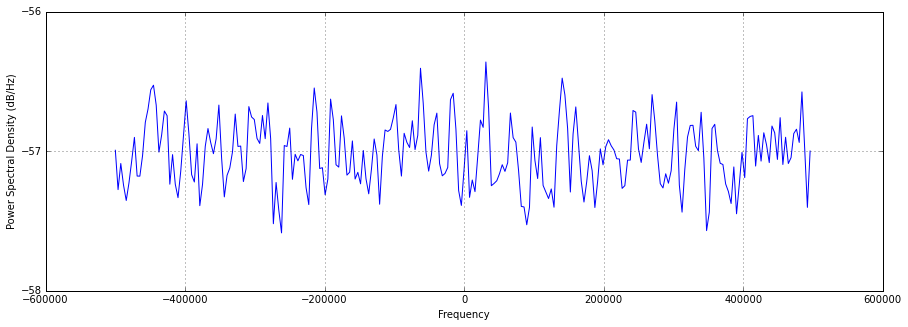

In [7]:
N = Fs/10
noise = np.random.randn(N) + 1.0j * np.random.randn(N)
psd(noise, Fs=Fs); None

In [8]:
import scipy.signal

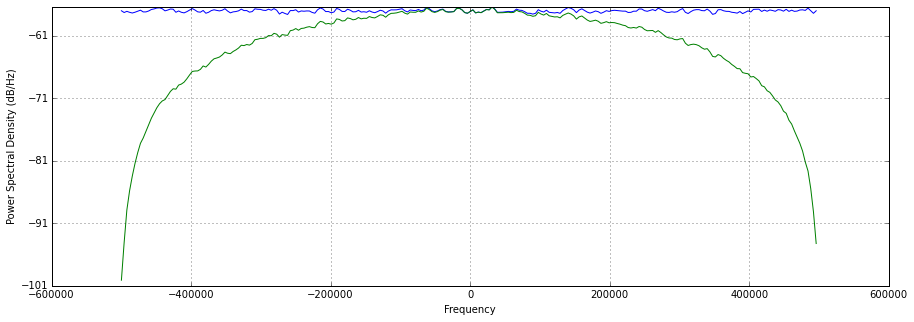

In [17]:
coeffs = [0.5, 0.5] # running average of length two

x = scipy.signal.lfilter(coeffs, 1.0, noise)
psd(noise, Fs=Fs)
psd(x, Fs=Fs); None

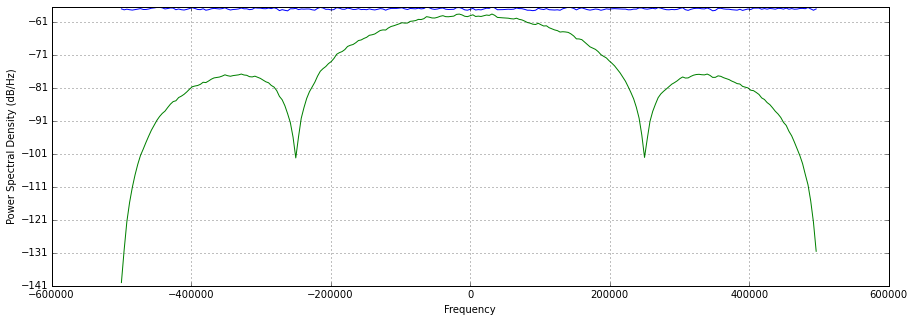

In [12]:
coeffs = [0.1, 0.2,0.2,0.2,0.1]

x = scipy.signal.lfilter(coeffs, 1.0, noise)
psd(noise, Fs=Fs)
psd(x, Fs=Fs); None

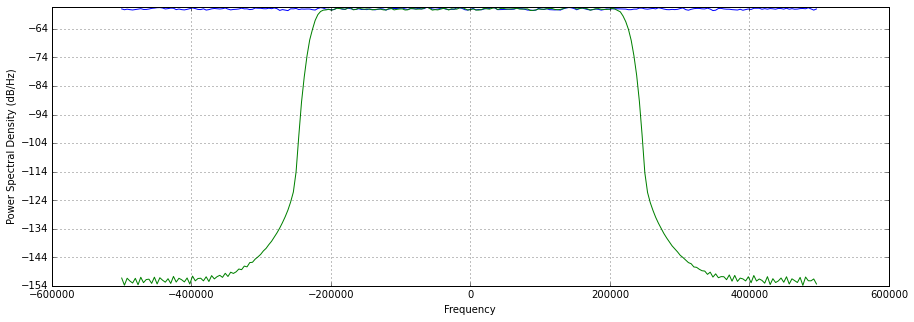

In [22]:
bands = [0, 0.2, 0.25, 0.5]
desired = [1,0]

coeffs = scipy.signal.remez(111, bands, desired)

psd(noise, Fs=Fs)
x = scipy.signal.lfilter(coeffs, 1.0, noise)
psd(x, Fs=Fs); None

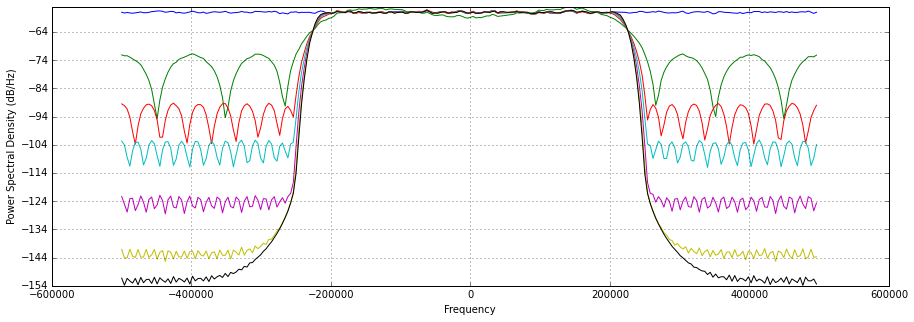

In [23]:
bands = [0, 0.2, 0.25, 0.5]
desired = [1,0]

psd(noise, Fs=Fs)

for n in [11, 31, 47, 73, 97, 111]:

    coeffs = scipy.signal.remez(n, bands, desired)

    x = scipy.signal.lfilter(coeffs, 1.0, noise)
    psd(x, Fs=Fs); None

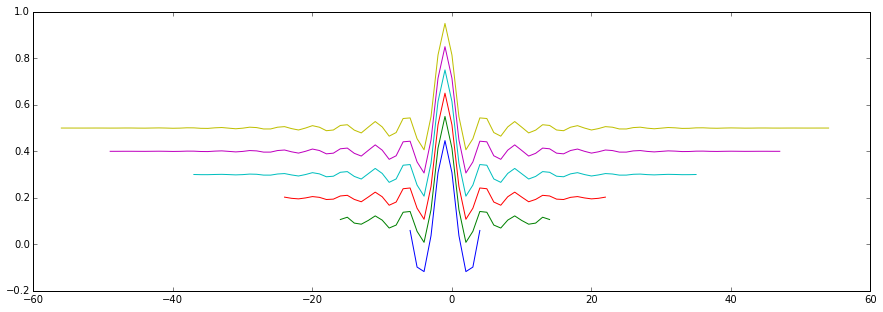

In [27]:
for i,n in enumerate([11, 31, 47, 73, 97, 111]):
    coeffs = scipy.signal.remez(n, bands, desired)
    plot(np.arange(-n/2, n/2, 1), coeffs+0.1*i)